In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import os

notebook_path = os.path.abspath('')
import sys
# Find the part of the path that contains 'commitFit'
commit_fit_path = None
for part in notebook_path.split(os.sep):
    print(part)
    if 'ensemble_commit' in part:
        commit_fit_path = notebook_path.split(part)[0] + part
        print(commit_fit_path)
        break

if commit_fit_path is None:
    raise ValueError("Path containing 'ensemble_commit' not found in notebook path.")


if commit_fit_path not in sys.path:
    sys.path.append(commit_fit_path)

import ensemble_model.preprocesser as preprocesser 
import ensemble_model.MoE_model_smooth_cum_loss as moe 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer, DistilBertModel

# import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve,classification_report



root
ensemble_commit
/root/ensemble_commit


In [2]:
# moe.BiLSTMStudent

In [3]:
df = pd.read_json(r'../datasets/patch_db.json', encoding='utf_8_sig')
df.dropna(inplace=True)
label2id={'non-security':0,'security':1}
df = df.replace({"category": label2id})
df

/tmp/ipykernel_1537/183603274.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"category": label2id})


,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,NA,NA,0,540958e2f5a87b81aa5f55ce40b3e2869754f97d,commit 540958e2f5a87b81aa5f55ce40b3e2869754f97...,diff --git a/drivers/staging/comedi/drivers/cb...,stoth68000,media-tree,wild
1,NA,NA,0,64d240b721b21e266ffde645ec965c3b6d1c551f,commit 64d240b721b21e266ffde645ec965c3b6d1c551...,diff --git a/drivers/target/target_core_file.c...,stoth68000,media-tree,wild
2,NA,NA,0,f181dd278274f50e689ebd13237010a90b430164,commit f181dd278274f50e689ebd13237010a90b43016...,diff --git a/include/paths.h b/include/paths.h...,openbsd,src,wild
3,NA,NA,0,0abdc3723b5d33dde698ab941325edec2819c128,commit 0abdc3723b5d33dde698ab941325edec2819c12...,diff --git a/gnu/usr.bin/binutils/ld/lexsup.c ...,openbsd,src,wild
4,NA,NA,0,d7930d7f820e5dd6b07b823f155aeb943b525e16,commit d7930d7f820e5dd6b07b823f155aeb943b525e1...,diff --git a/src/expat_erl.c b/src/expat_erl.c...,esl,MongooseIM,wild
...,...,...,...,...,...,...,...,...,...
35810,CVE-2013-0217,399,1,7d5145d8eb2b9791533ffe4dc003b129b9696c48,From 7d5145d8eb2b9791533ffe4dc003b129b9696c48 ...,diff --git a/drivers/net/xen-netback/netback.c...,torvalds,linux,cve
35811,CVE-2018-18311,119,1,34716e2a6ee2af96078d62b065b7785c001194be,From 34716e2a6ee2af96078d62b065b7785c001194be ...,diff --git a/util.c b/util.c\nindex 7282dd9cfe...,Perl,perl5,cve
35812,CVE-2019-12984,476,1,385097a3675749cbc9e97c085c0e5dfe4269ca51,From 385097a3675749cbc9e97c085c0e5dfe4269ca51 ...,diff --git a/net/nfc/netlink.c b/net/nfc/netli...,torvalds,linux,cve
35813,CVE-2013-0865,119,1,f3d16706060ab6ae6dc78f15359fab3fd87c9495,From f3d16706060ab6ae6dc78f15359fab3fd87c9495 ...,diff --git a/libavcodec/vqavideo.c b/libavcode...,NA,NA,cve


In [4]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [5]:
# len(df_dataset)

In [6]:
# df_dataset[0]

In [7]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('../models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

codebert_model = BertModel.from_pretrained('../models/bert-base-cased')
codebert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions

In [8]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train_data,_ = train_test_split(train_data, train_size=0.1, random_state=42)
test_data, val_data = train_test_split(test_data, train_size=0.1, random_state=42)
val_data, _ = train_test_split(val_data, train_size=0.1, random_state=42)
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [13]:
train_data['category'].value_counts()

category
0    1644
1     863
Name: count, dtype: int64

In [14]:
val_data

,index,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,26915,NA,NA,1,44241628bb207ec211bebd156aaf69470d90c209,commit 44241628bb207ec211bebd156aaf69470d90c20...,diff --git a/drivers/thermal/power_allocator.c...,stoth68000,media-tree,wild
1,18930,NA,NA,0,fe82772c377e1c0bdb1ce724f8bbe8ceb6294ee1,commit fe82772c377e1c0bdb1ce724f8bbe8ceb6294ee...,diff --git a/core/fork_server.c b/core/fork_se...,unbit,uwsgi,wild
2,15526,NA,NA,0,625c6ace93bb1515ff16840741d6f7567be6ebb8,commit 625c6ace93bb1515ff16840741d6f7567be6ebb...,diff --git a/send.c b/send.c\nindex 2ced24b..9...,reubenhwk,radvd,wild
3,13501,NA,NA,0,8a7cf3febbb2b7c1ade717ddb3065de67c5983c5,commit 8a7cf3febbb2b7c1ade717ddb3065de67c5983c...,diff --git a/drivers/net/wireless/wl12xx/main....,mjg59,linux,wild
4,10592,NA,NA,0,5464baecf521d1ca8095604f5a7371443c94226a,commit 5464baecf521d1ca8095604f5a7371443c94226...,diff --git a/linux-user/syscall.c b/linux-user...,qemu,qemu,wild
...,...,...,...,...,...,...,...,...,...,...
478,12654,NA,NA,0,056790923e1c4eed5d8cc502e1092944a2b23025,commit 056790923e1c4eed5d8cc502e1092944a2b2302...,diff --git a/sound/soc/soc-pcm.c b/sound/soc/s...,stoth68000,media-tree,wild
479,7284,NA,NA,0,53155c0a5949d5cc3bd434d838e5b0c6e0542f9b,commit 53155c0a5949d5cc3bd434d838e5b0c6e0542f9...,diff --git a/drivers/gpu/drm/i915/intel_displa...,torvalds,linux,wild
480,22406,NA,NA,0,7b96dc023a1b487bce59256fde14b8bb28b45aea,commit 7b96dc023a1b487bce59256fde14b8bb28b45ae...,diff --git a/drivers/sbus/char/vfc.h b/drivers...,torvalds,linux,wild
481,26222,NA,NA,1,aa9a4a1edfbd3d223af01db833da2f07850bc655,commit aa9a4a1edfbd3d223af01db833da2f07850bc65...,diff --git a/fs/pstore/ram.c b/fs/pstore/ram.c...,stoth68000,media-tree,wild


In [15]:
# val_data

In [16]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)

In [17]:
base_model1 = moe.BaseModel(bert_model)
base_model2 = moe.BaseModel(codebert_model)

In [18]:
# Load BERT and CodeBERT models and tokenizers
bert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

codebert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you

In [19]:
encoder_model1 = moe.EncoderModel(bert_model)
encoder_model2 = moe.EncoderModel(bert_model)

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10 Loss: 0.6154: 100%|██████████| 314/314 [02:37<00:00,  2.00batch/s]


=============================train========================
Validation Accuracy: 0.8054
Precision: 0.8498
Recall: 0.8054
F1-Score: 0.7792


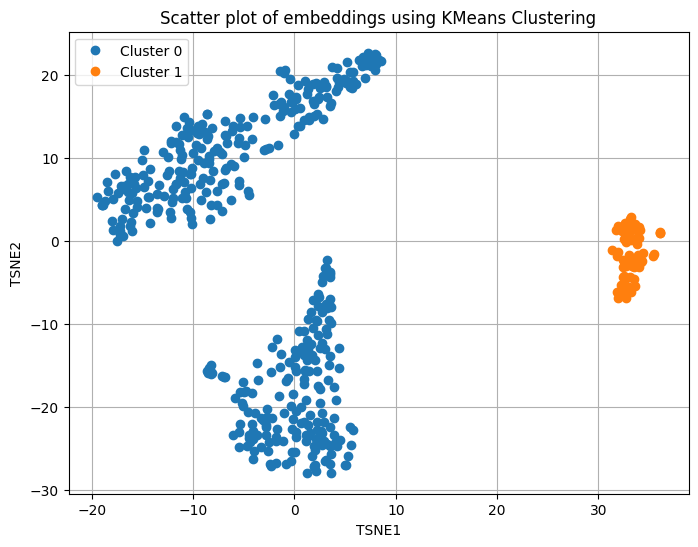

Epoch 2/10 Loss: 0.4604: 100%|██████████| 314/314 [02:39<00:00,  1.97batch/s]


=============================train========================
Validation Accuracy: 0.9048
Precision: 0.9060
Recall: 0.9048
F1-Score: 0.9028


<Figure size 640x480 with 0 Axes>

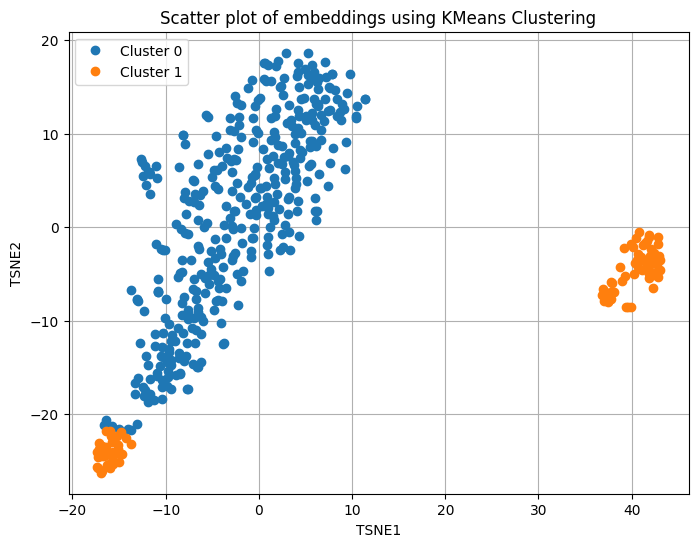

Epoch 3/10 Loss: 0.3608: 100%|██████████| 314/314 [02:38<00:00,  1.98batch/s]


=============================train========================
Validation Accuracy: 0.8944
Precision: 0.8939
Recall: 0.8944
F1-Score: 0.8929


<Figure size 640x480 with 0 Axes>

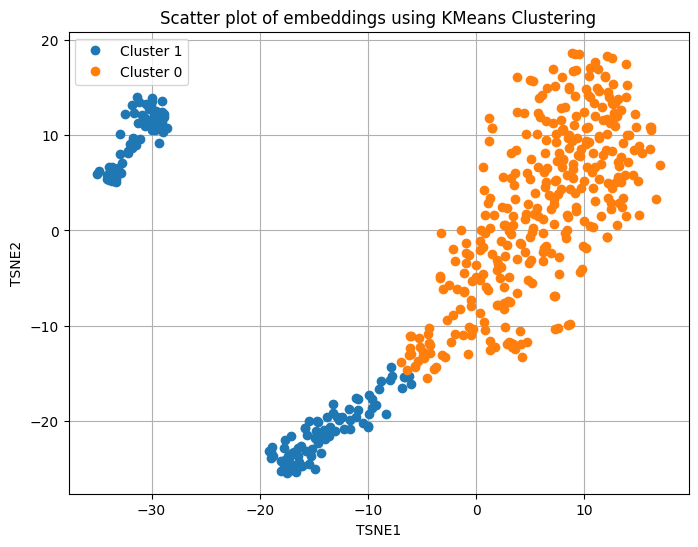

Epoch 4/10 Loss: 0.2879: 100%|██████████| 314/314 [02:41<00:00,  1.94batch/s]


=============================train========================
Validation Accuracy: 0.8903
Precision: 0.8894
Recall: 0.8903
F1-Score: 0.8891


<Figure size 640x480 with 0 Axes>

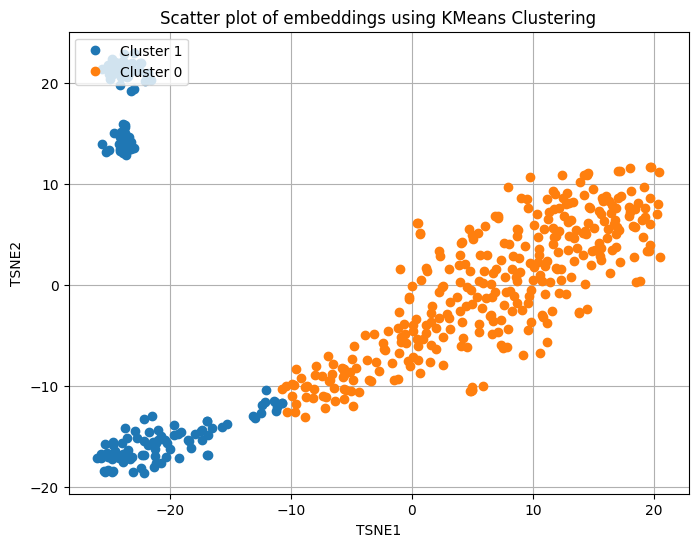

Epoch 5/10 Loss: 0.2355: 100%|██████████| 314/314 [02:41<00:00,  1.94batch/s]


=============================train========================
Validation Accuracy: 0.9110
Precision: 0.9141
Recall: 0.9110
F1-Score: 0.9086


<Figure size 640x480 with 0 Axes>

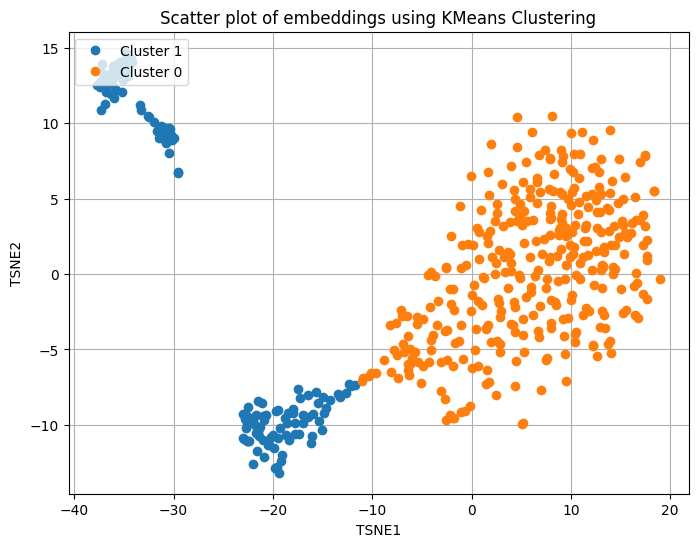

Epoch 6/10 Loss: 0.2018: 100%|██████████| 314/314 [02:41<00:00,  1.94batch/s]


=============================train========================
Validation Accuracy: 0.8923
Precision: 0.8921
Recall: 0.8923
F1-Score: 0.8922


<Figure size 640x480 with 0 Axes>

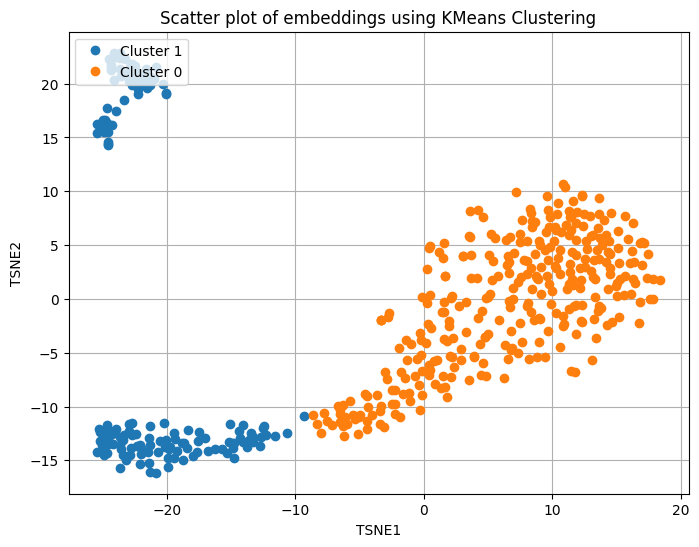

Epoch 7/10 Loss: 0.1593: 100%|██████████| 314/314 [02:40<00:00,  1.96batch/s]


=============================train========================
Validation Accuracy: 0.9089
Precision: 0.9084
Recall: 0.9089
F1-Score: 0.9080


<Figure size 640x480 with 0 Axes>

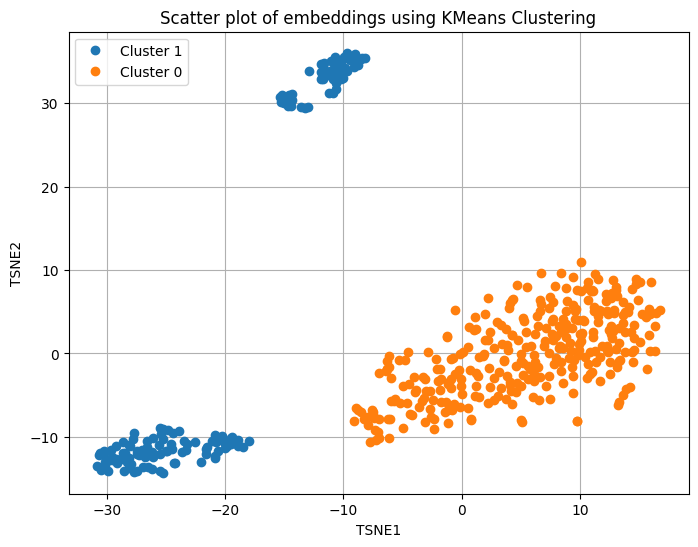

Epoch 8/10 Loss: 0.1232: 100%|██████████| 314/314 [02:41<00:00,  1.94batch/s]


=============================train========================
Validation Accuracy: 0.8716
Precision: 0.8720
Recall: 0.8716
F1-Score: 0.8718


<Figure size 640x480 with 0 Axes>

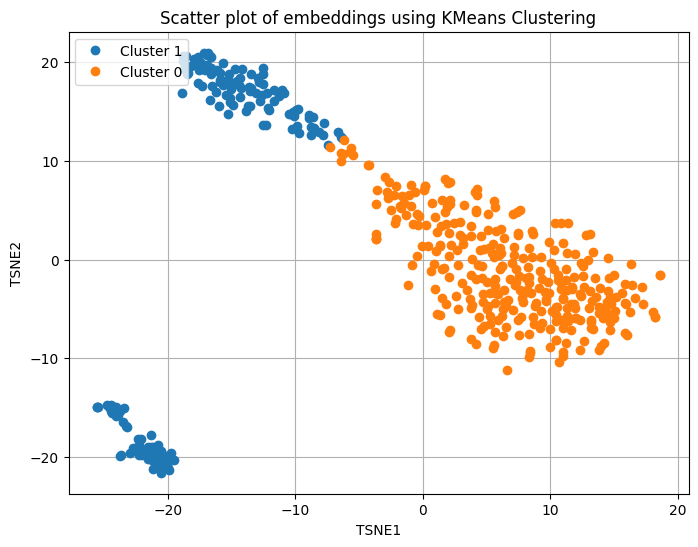

Epoch 9/10 Loss: 0.0785: 100%|██████████| 314/314 [02:41<00:00,  1.94batch/s]


=============================train========================
Validation Accuracy: 0.8841
Precision: 0.8841
Recall: 0.8841
F1-Score: 0.8841


<Figure size 640x480 with 0 Axes>

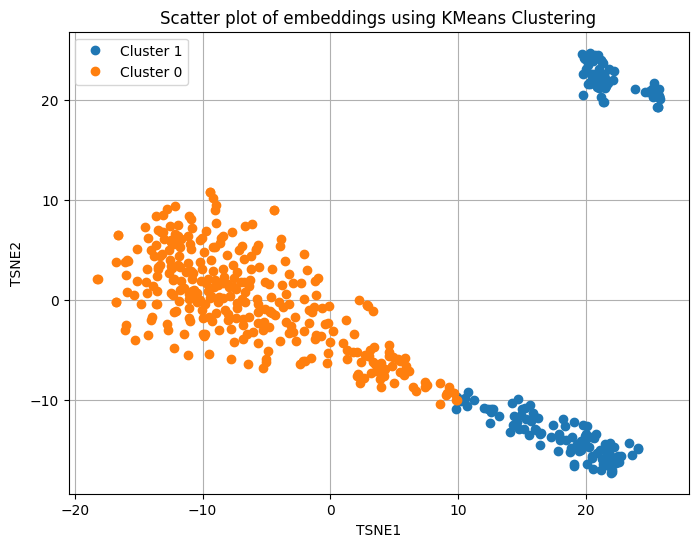

Epoch 10/10 Loss: 0.0249: 100%|██████████| 314/314 [02:41<00:00,  1.95batch/s]


=============================train========================
Validation Accuracy: 0.8965
Precision: 0.8960
Recall: 0.8965
F1-Score: 0.8962


<Figure size 640x480 with 0 Axes>

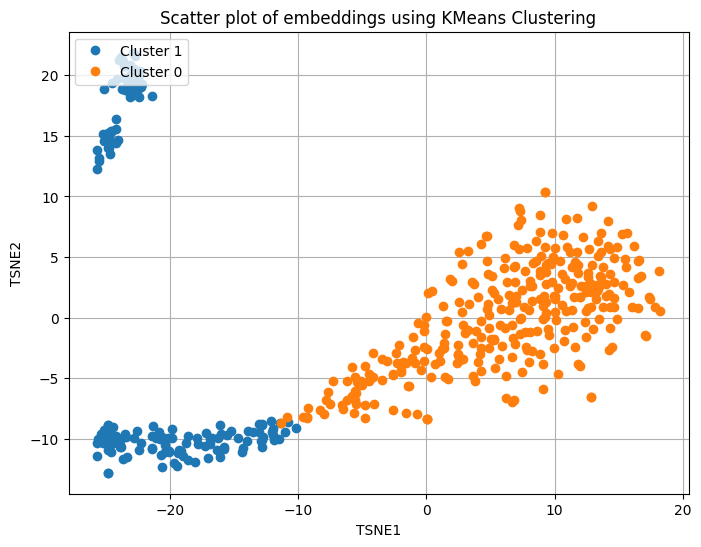

<Figure size 640x480 with 0 Axes>

In [20]:
# Create stacking model
moe_model = moe.MoEModel(base_model1, base_model2)
# Train the model
moe_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

In [38]:
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Validation Accuracy: 0.9032
Precision: 0.9026
Recall: 0.9032
F1-Score: 0.9028


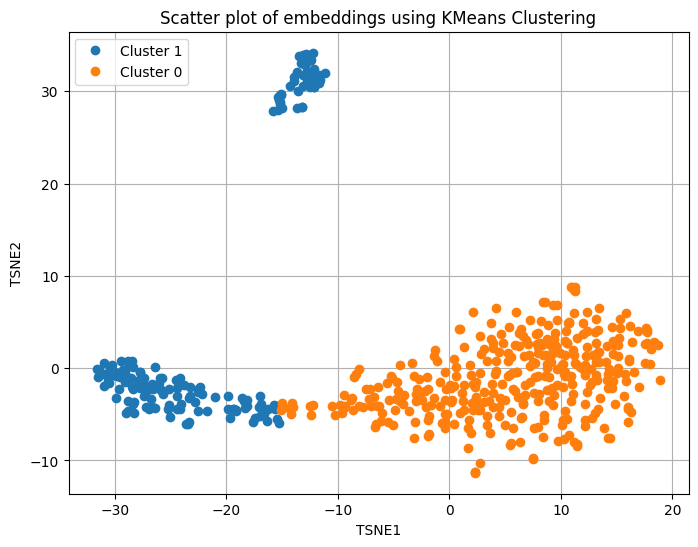

<Figure size 640x480 with 0 Axes>

In [39]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

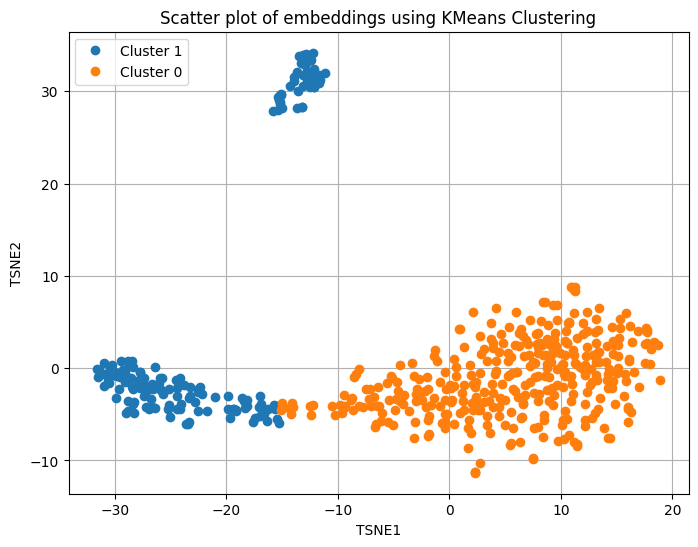

<Figure size 640x480 with 0 Axes>

In [40]:
moe_model.plot_tsne(test_embeddings,test_labels)

In [49]:
from sklearn.cluster import KMeans
import seaborn as sns

In [50]:
def plot_tsne(embeddings, labels):
        # working code 
        # tsne = TSNE(n_components=2, random_state=0)
        # embeddings_np = np.vstack(embeddings, dtype=np.float32)
        
        # print(embeddings_np.shape)
        
        # embeddings_2d = tsne.fit_transform(embeddings_np)
        
        # plt.figure(figsize=(10, 8))
        # scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
        # plt.colorbar(scatter, label='Labels')
        # plt.title('t-SNE Visualization of Embeddings')
        # plt.show()
    
        
        tsne = TSNE(n_components=2, random_state=42)
    
        print("embedding来啦",embeddings[0].shape)
        # embeddings_cpu = combined.cpu().detach()
        # embeddings_np = torch.stack(embeddings_cpu).numpy()  # 形状：(600, 8, 768)
        
        # 维度变换
        embeddings_np = np.vstack(embeddings) 
        embeddings_2d = tsne.fit_transform(embeddings_np)
        df_tsne = pd.DataFrame(embeddings_2d, columns=['TSNE1', 'TSNE2'])
        df_tsne['Class Name'] = labels # Add labels column from df_train to df_tsne
        df_tsne
        
        fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
        sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
        sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Class Name', palette='hls')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        plt.title('Scatter plot of news using t-SNE');
        plt.xlabel('TSNE1');
        plt.ylabel('TSNE2');
        plt.axis('equal')
    
        # Apply KMeans
        kmeans_model = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(embeddings_np)
        labels = kmeans_model.fit_predict(embeddings_np)
        
        df_tsne['Cluster'] = labels
        df_tsne
        fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
        sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
        sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='magma')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        plt.title('Scatter plot of news using KMeans Clustering');
        plt.xlabel('TSNE1')
        plt.ylabel('TSNE2')
        plt.axis('equal')

embedding来啦 (1536,)


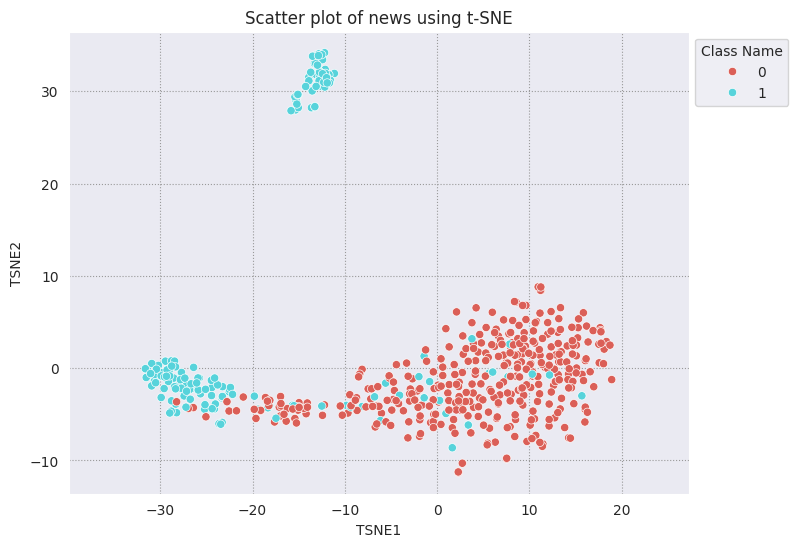

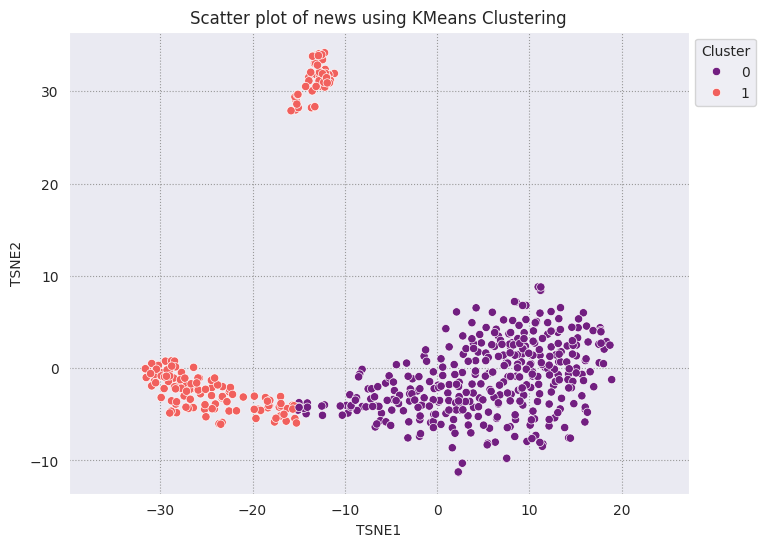

In [51]:
plot_tsne(test_embeddings,test_labels)

In [24]:
torch.save(moe_model, "smooth_cum_entire_bert_model.pth")

In [25]:
# moe_model = torch.load("smooth_cum_entire_bert_model.pth")                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [41]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

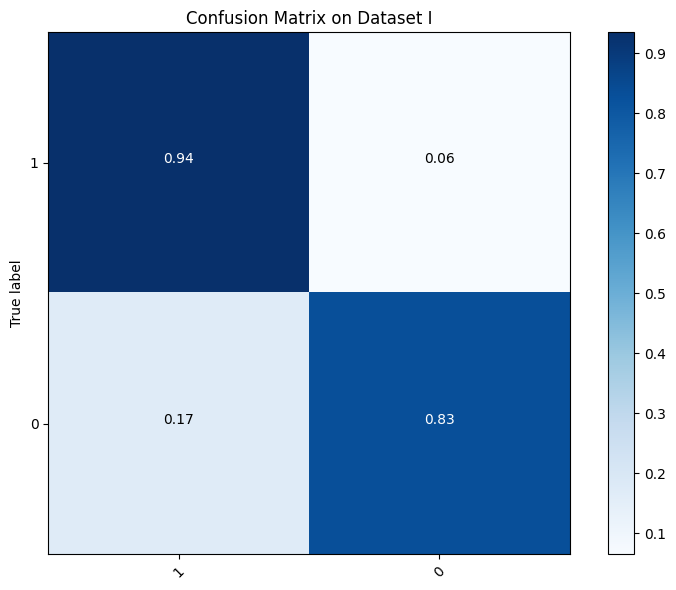

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test_data['category'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages

In [43]:
# moe_model

In [31]:
print(classification_report(test_labels,test_predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       318
           1       0.86      0.84      0.85       165

    accuracy                           0.90       483
   macro avg       0.89      0.88      0.88       483
weighted avg       0.90      0.90      0.90       483



In [32]:
test_acc

0.8964803312629399

In [33]:
model_save_path = 'best_model'

In [34]:
# student_model = moe.BiLSTMStudent(hidden_dim=256,output_dim =2, base_model1=encoder_model1,base_model2=encoder_model2)

In [35]:
# train_student_model

In [37]:
#发送多种类型的邮件
from email.mime.multipart import MIMEMultipart
import smtplib

from email.mime.text import MIMEText
msg_from = '915803745@qq.com'  # 发送方邮箱
passwd = 'vcuosuurrgkfbdai'   #就是上面的授权码
 
# to= ['g.zhang@gotion.com', 'j.tong@gotion.com'] #接受方邮箱
to= ['j.tong@gotion.com'] #接受方邮箱
#设置邮件内容
#MIMEMultipart类可以放任何内容
msg = MIMEMultipart()
conntent="在线模型训练完毕"
#把内容加进去
msg.attach(MIMEText(conntent,'plain','utf-8'))
 
#设置邮件主题
msg['Subject']="在线模型训练完毕"
 
#发送方信息
msg['From']=msg_from
 
#开始发送
 
#通过SSL方式发送，服务器地址和端口
s = smtplib.SMTP_SSL("smtp.qq.com", 465)
# 登录邮箱
s.login(msg_from, passwd)
#开始发送
s.sendmail(msg_from,to,msg.as_string())
print("在线模型训练完毕")

在线模型训练完毕
